In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("UWYieldDataNDVI.csv")

In [3]:
df = df.drop(df[df['Mean_NDVI']==0].index).drop(df[df['Yield, kg DM/ha']>=6500].index)

In [4]:
y = df['Yield, kg DM/ha'].to_numpy()
m = df['Mean_NDVI'].to_numpy()
s = df['SD_NDVI'].to_numpy()

Text(0, 0.5, 'Yield')

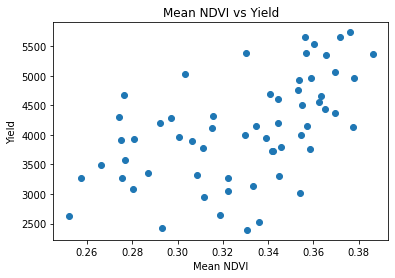

In [5]:
plt.figure()
plt.scatter(m,y)
plt.title("Mean NDVI vs Yield")
plt.xlabel("Mean NDVI")
plt.ylabel("Yield")

Text(0, 0.5, 'Yield')

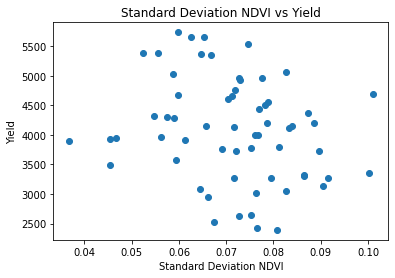

In [6]:
plt.figure()
plt.scatter(s,y)
plt.title("Standard Deviation NDVI vs Yield")
plt.xlabel("Standard Deviation NDVI")
plt.ylabel("Yield")

In [7]:
dates = np.unique(df['Date'])
gcps = np.unique(df['GCP'])

# By Day Analysis

In [8]:
day1 = df.loc[df['Date']==dates[1]]
y = day1['Yield, kg DM/ha'].to_numpy()
m = day1['Mean_NDVI'].to_numpy()
s = day1['SD_NDVI'].to_numpy()

Text(0, 0.5, 'Yield')

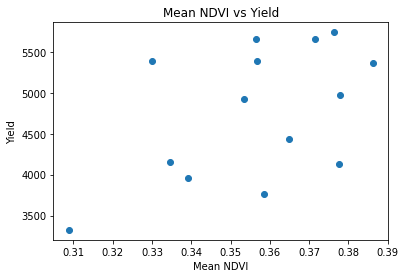

In [9]:
plt.figure()
plt.scatter(m,y)
plt.title("Mean NDVI vs Yield")
plt.xlabel("Mean NDVI")
plt.ylabel("Yield")

Text(0, 0.5, 'Yield')

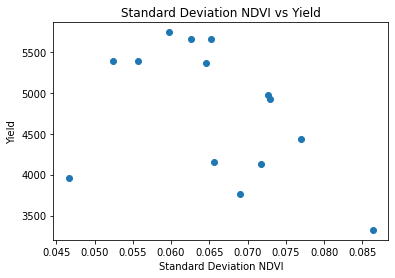

In [10]:
plt.figure()
plt.scatter(s,y)
plt.title("Standard Deviation NDVI vs Yield")
plt.xlabel("Standard Deviation NDVI")
plt.ylabel("Yield")

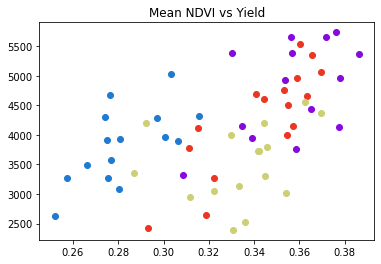

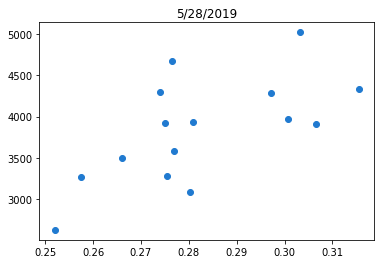

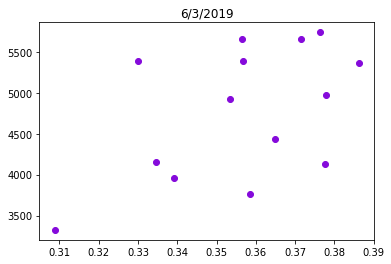

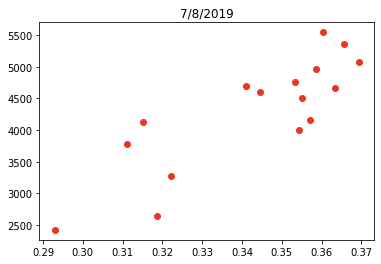

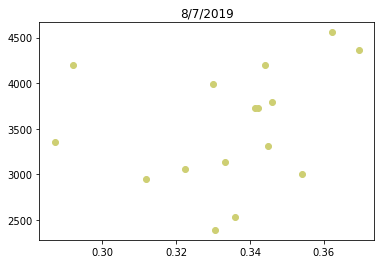

In [11]:
import random
r = lambda: random.randint(0,255)
colors = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(len(dates))]

plt.figure()
for it,day in enumerate(dates):
    d = df.loc[df['Date']==day]
    y = d['Yield, kg DM/ha'].to_numpy()
    m = d['Mean_NDVI'].to_numpy()
    s = d['SD_NDVI'].to_numpy()
    plt.scatter(m,y,color=colors[it])
    plt.title("Mean NDVI vs Yield")
    
for it,day in enumerate(dates):
    plt.figure()
    d = df.loc[df['Date']==day]
    y = d['Yield, kg DM/ha'].to_numpy()
    m = d['Mean_NDVI'].to_numpy()
    s = d['SD_NDVI'].to_numpy()
    plt.scatter(m,y,color=colors[it])
    plt.title(day)
# plt.title("Mean NDVI vs Yield")
# plt.xlabel("Mean NDVI")
# plt.ylabel("Yield")

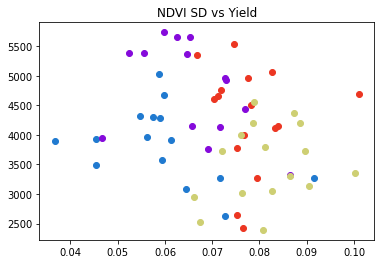

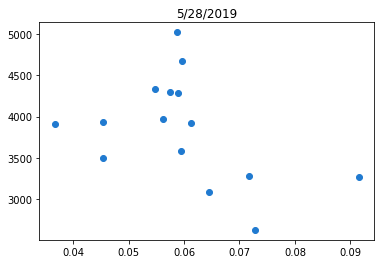

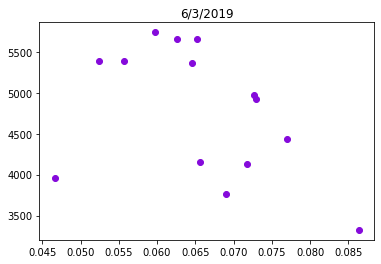

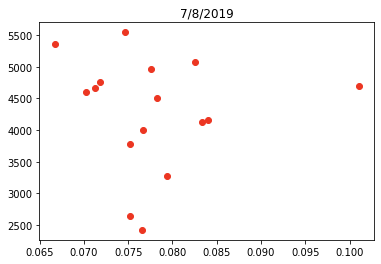

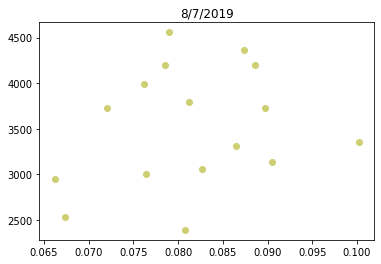

In [12]:
plt.figure()
for it,day in enumerate(dates):
    d = df.loc[df['Date']==day]
    y = d['Yield, kg DM/ha'].to_numpy()
    m = d['Mean_NDVI'].to_numpy()
    s = d['SD_NDVI'].to_numpy()
    plt.scatter(s,y,color=colors[it])
    plt.title("NDVI SD vs Yield")
    
for it,day in enumerate(dates):
    plt.figure()
    d = df.loc[df['Date']==day]
    y = d['Yield, kg DM/ha'].to_numpy()
    m = d['Mean_NDVI'].to_numpy()
    s = d['SD_NDVI'].to_numpy()
    plt.scatter(s,y,color=colors[it])
    plt.title(day)
# plt.title("Mean NDVI vs Yield")
# plt.xlabel("Mean NDVI")
# plt.ylabel("Yield")

# By GCP Analysis

In [13]:
gcp1 = df.loc[df['GCP']==gcps[5]]
y = gcp1['Yield, kg DM/ha'].to_numpy()
m = gcp1['Mean_NDVI'].to_numpy()
s = gcp1['SD_NDVI'].to_numpy()

Text(0, 0.5, 'Yield')

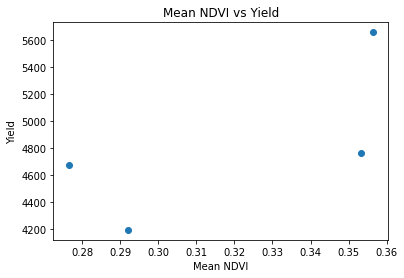

In [14]:
plt.figure()
plt.scatter(m,y)
plt.title("Mean NDVI vs Yield")
plt.xlabel("Mean NDVI")
plt.ylabel("Yield")

Text(0, 0.5, 'Yield')

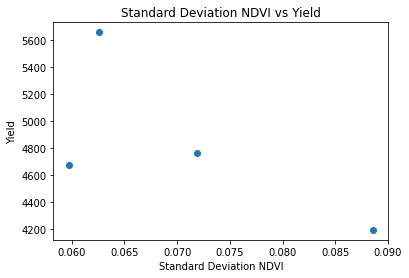

In [15]:
plt.figure()
plt.scatter(s,y)
plt.title("Standard Deviation NDVI vs Yield")
plt.xlabel("Standard Deviation NDVI")
plt.ylabel("Yield")

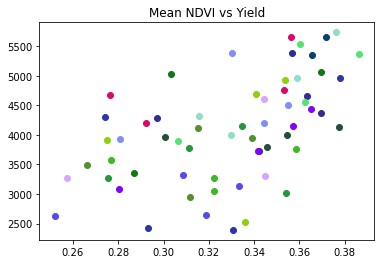

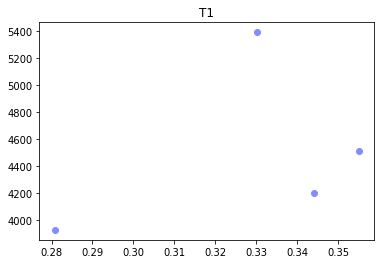

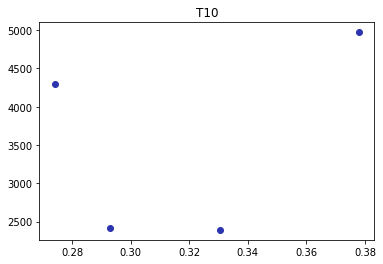

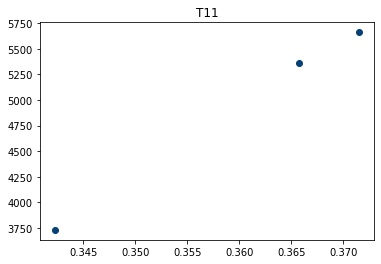

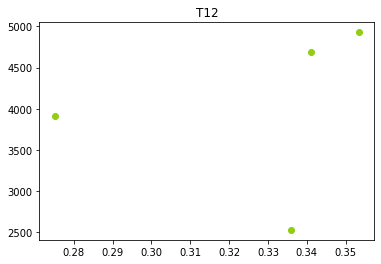

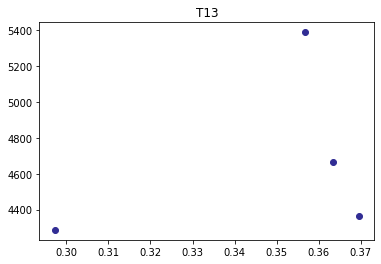

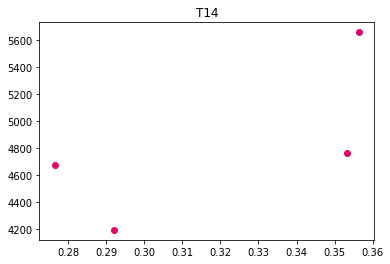

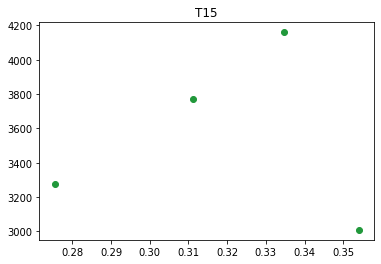

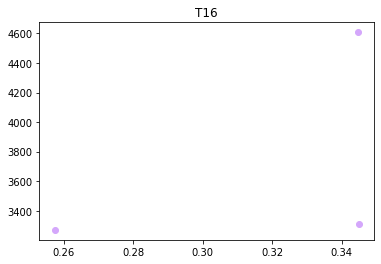

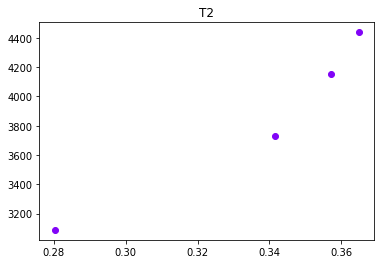

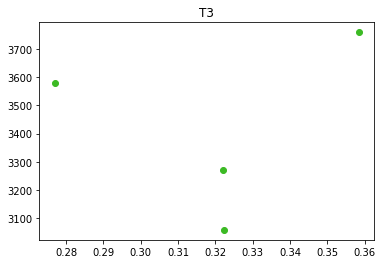

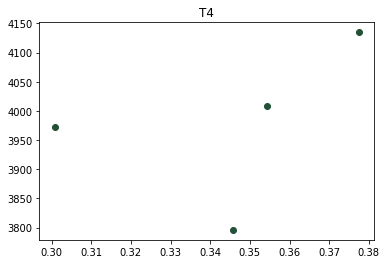

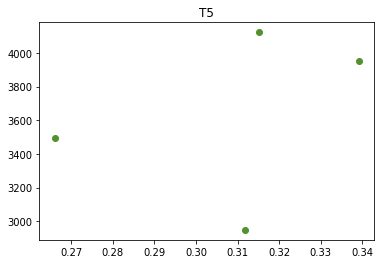

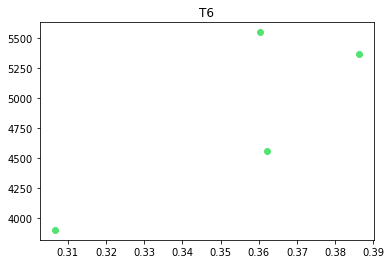

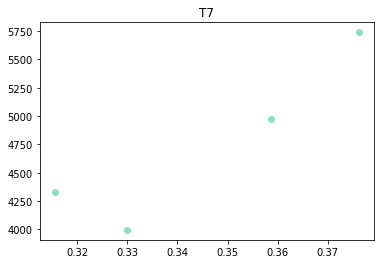

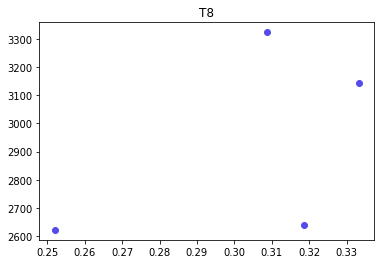

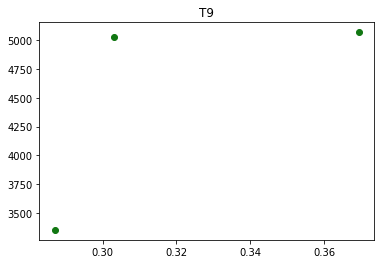

In [16]:
import random
r = lambda: random.randint(0,255)
colors = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(len(gcps))]

plt.figure()
for it,gcp in enumerate(gcps):
    d = df.loc[df['GCP']==gcp]
    y = d['Yield, kg DM/ha'].to_numpy()
    m = d['Mean_NDVI'].to_numpy()
    s = d['SD_NDVI'].to_numpy()
    plt.scatter(m,y,color=colors[it])
    plt.title("Mean NDVI vs Yield")
    
for it,gcp in enumerate(gcps):
    plt.figure()
    d = df.loc[df['GCP']==gcp]
    y = d['Yield, kg DM/ha'].to_numpy()
    m = d['Mean_NDVI'].to_numpy()
    s = d['SD_NDVI'].to_numpy()
    plt.scatter(m,y,color=colors[it])
    plt.title(gcp)

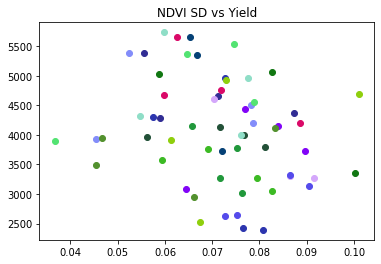

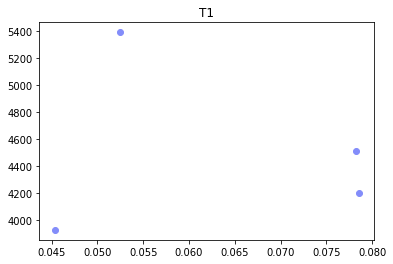

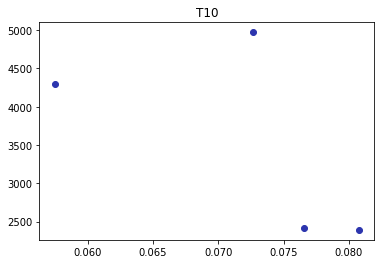

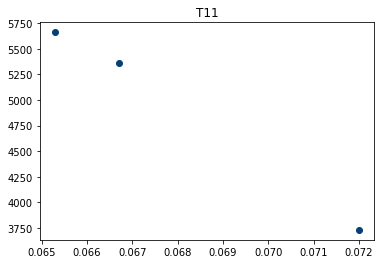

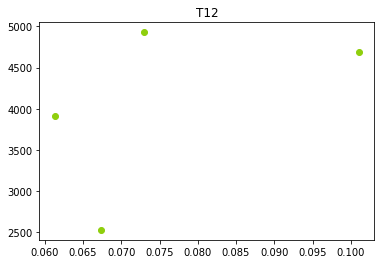

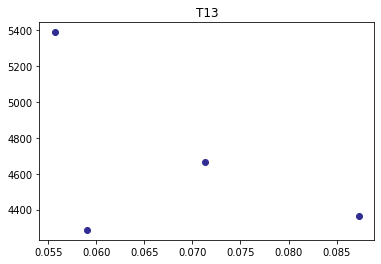

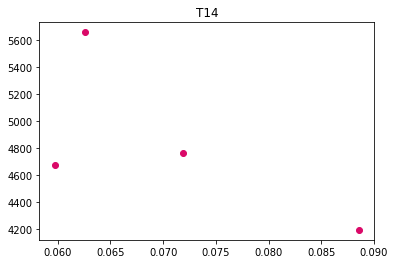

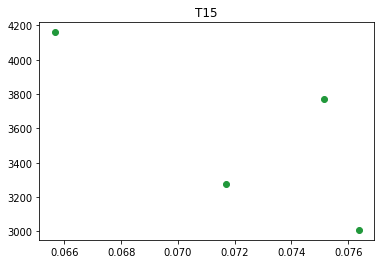

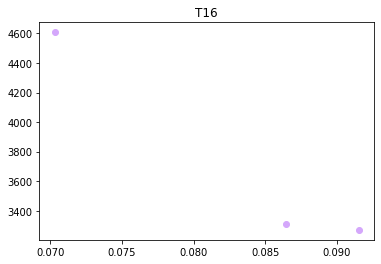

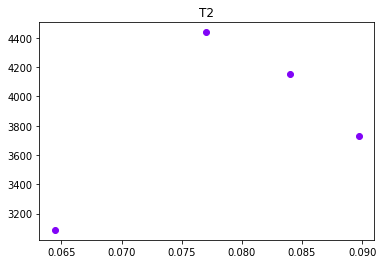

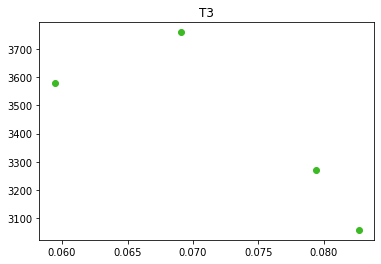

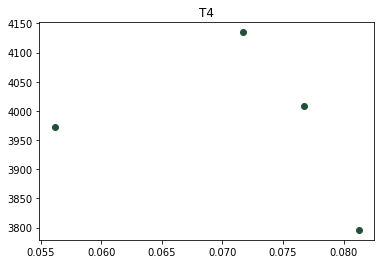

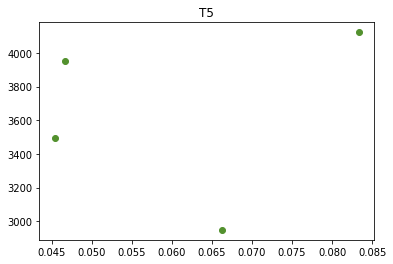

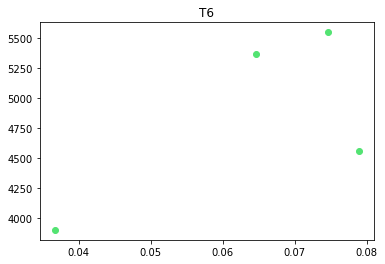

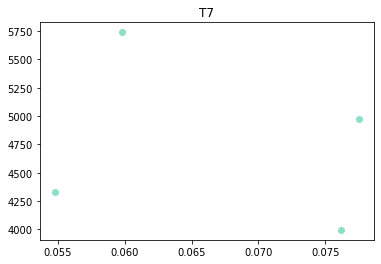

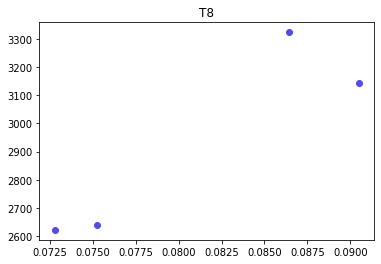

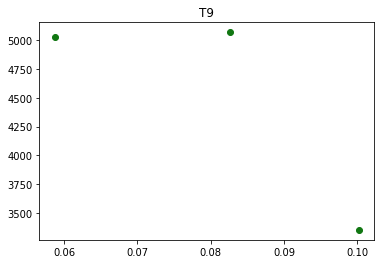

In [17]:
plt.figure()
for it,gcp in enumerate(gcps):
    d = df.loc[df['GCP']==gcp]
    y = d['Yield, kg DM/ha'].to_numpy()
    m = d['Mean_NDVI'].to_numpy()
    s = d['SD_NDVI'].to_numpy()
    plt.scatter(s,y,color=colors[it])
    plt.title("NDVI SD vs Yield")
    
for it,gcp in enumerate(gcps):
    plt.figure()
    d = df.loc[df['GCP']==gcp]
    y = d['Yield, kg DM/ha'].to_numpy()
    m = d['Mean_NDVI'].to_numpy()
    s = d['SD_NDVI'].to_numpy()
    plt.scatter(s,y,color=colors[it])
    plt.title(gcp)

# Bivariate Analysis

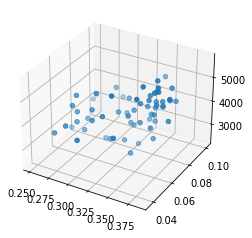

In [18]:
y = df['Yield, kg DM/ha'].to_numpy()
m = df['Mean_NDVI'].to_numpy()
s = df['SD_NDVI'].to_numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(m, s, y)

In [19]:
from sklearn import linear_model

x = df[['Mean_NDVI','SD_NDVI']].to_numpy().reshape(-1,2)
y = df['Yield, kg DM/ha'].to_numpy()

ols = linear_model.LinearRegression()
model = ols.fit(x, y)

In [20]:
print(ols.coef_)
print(ols.intercept_)

[ 14932.93497103 -22463.65080116]
785.6317800308871


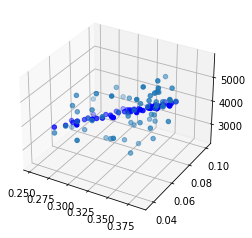

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(m, s, y)

y_fit = ols.predict(x)
ax.scatter(x[:,0],x[:,1], y_fit , color='blue')

plt.show()